<a href="https://colab.research.google.com/github/hncpyj/DataAnalytics/blob/main/DescriptiveStatisticsAndContingencyTable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from google.colab import drive

file = drive.mount("/content/drive/")
survey = pd.read_csv("/content/drive/MyDrive/DataAnalytics/MultivariateAnalysis/mva/survey.csv")
survey.head(5)

# 평균 구하기
survey["age"].mean()
survey.age.mean()

# 표준편차 구하기
survey["age"].std()

# nlevels(survey$sex)

# 범주형 변수로 변환하기
survey["sex"] = survey["sex"].astype("category")
survey["job"] = survey["job"].astype("category")
survey["edu"] = survey["edu"].astype("category")
survey.marriage = survey.marriage.astype("category")

#nlevels(survey$sex)

# 연속인 변수의 기술통계량 구하기
survey.iloc[:, 1:].describe()

agestat_by_sex = survey.groupby("sex")["age"].describe()
agestat_by_sex
agestat_by_sex["mean"]   # 표준편차 : std

# (sex, marriage)를 그룹으로 age의 기술통계량 구하기
agestat_by_sex_marriage = survey.groupby(["sex","marriage"])["age"].describe()
agestat_by_sex_marriage
agestat_by_sex_marriage["mean"]    # 표준편차 : std

sex_freq = pd.crosstab(index=survey.sex, columns='count')
sex_freq
# (sex, edu)의 분할표 구하기
sex_edu_table = pd.crosstab(index=survey.sex, columns=survey.edu)
sex_edu_table
# (sex, edu)의 분할표–카이제곱 검정
from scipy.stats import chi2_contingency

chi2_contingency(sex_edu_table)
help(chi2_contingency)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
Help on function chi2_contingency in module scipy.stats.contingency:

chi2_contingency(observed, correction=True, lambda_=None)
    Chi-square test of independence of variables in a contingency table.
    
    This function computes the chi-square statistic and p-value for the
    hypothesis test of independence of the observed frequencies in the
    contingency table [1]_ `observed`.  The expected frequencies are computed
    based on the marginal sums under the assumption of independence; see
    `scipy.stats.contingency.expected_freq`.  The number of degrees of
    freedom is (expressed using numpy functions and attributes)::
    
        dof = observed.size - sum(observed.shape) + observed.ndim - 1
    
    
    Parameters
    ----------
    observed : array_like
        The contingency table. The table contains the observed frequencies
        (i.e. nu

In [ ]:
import numpy as np
import pandas as pd
#from google.colab import drive

#file = drive.mount("/content/drive/MyDrive/DataAnalytics/")
survey = pd.read_csv("/content/drive/MyDrive/DataAnalytics/MultivariateAnalysis/mva/survey.csv")
survey.head(5)

,seq,sex,marriage,age,job,edu,salary
0,1,1,1,21,1,4,60
1,2,1,1,22,5,5,100
2,3,1,1,33,1,4,200
3,4,2,2,33,7,4,120
4,5,1,2,28,1,4,70


In [ ]:
# 평균 구하기
survey["age"].mean()
survey.age.mean()

34.275

In [ ]:
# 표준편차 구하기
survey["age"].std()

11.602359397542536

In [ ]:
#nlevels(survey$sex)

In [ ]:
# 범주형 변수로 변환하기
survey["sex"] = survey["sex"].astype("category")
survey["job"] = survey["job"].astype("category")
survey["edu"] = survey["edu"].astype("category")
survey.marriage = survey.marriage.astype("category")

In [ ]:
#nlevels(survey$sex)

In [ ]:
# 연속인 변수의 기술통계량 구하기
survey.iloc[:, 1:].describe()

agestat_by_sex = survey.groupby("sex")["age"].describe()
agestat_by_sex
agestat_by_sex["mean"]   # 표준편차 : std

sex
1    33.962963
2    34.923077
Name: mean, dtype: float64

In [ ]:
# (sex, marriage)를 그룹으로 age의 기술통계량 구하기
agestat_by_sex_marriage = survey.groupby(["sex","marriage"])["age"].describe()
agestat_by_sex_marriage
agestat_by_sex_marriage["mean"]    # 표준편차 : std

sex  marriage
1    1           24.800000
     2           37.866667
     3           50.500000
2    1           24.400000
     2           41.500000
Name: mean, dtype: float64

In [ ]:
sex_freq = pd.crosstab(index=survey.sex, columns='count')
sex_freq

col_0,count
sex,
1,27
2,13


In [ ]:
# (sex, edu)의 분할표 구하기
sex_edu_table = pd.crosstab(index=survey.sex, columns=survey.edu)
sex_edu_table

edu,1,2,3,4,5
sex,,,,,
1,1,1,1,13,11
2,0,0,2,6,5


In [ ]:
# (sex, edu)의 분할표–카이제곱 검정
from scipy.stats import chi2_contingency

chi2_contingency(sex_edu_table)
#help(chi2_contingency)

(2.578097665816964,
 0.6307078881367414,
 4,
 array([[ 0.675,  0.675,  2.025, 12.825, 10.8  ],
        [ 0.325,  0.325,  0.975,  6.175,  5.2  ]]))

In [ ]:
# 이변량 그래프

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# 데이터 읽기
co2 = pd.read_csv("/content/drive/MyDrive/DataAnalytics/MultivariateAnalysis/mva/co2.csv")
co2.head(2)
# 변수이름 지정하기
co2.columns = ["seq", "x"]
co2.head(2)

# 선그리기
plt.plot(co2.seq, co2.x)
# plot of mathematical functions
x = np.arange(0, 20, 0.1)
y = np.exp(-x/10)*np.cos(2*x)
plt.plot(x, y)

# 데이터 읽기
USairpollution = pd.read_csv("/content/drive/MyDrive/DataAnalytics/MultivariateAnalysis/mva/USairpollution.csv")
USairpollution.head(3)


# SO2 변숫값 * 5
USairpollution["SO2"] = USairpollution["SO2"] * 5
# 버블차트 그리기
plt.scatter('temp', 'wind', s='SO2', alpha=0.9, data=USairpollution)
plt.xlabel("temp", size=16)
plt.ylabel("wind", size=16)
plt.title("Bubble plot")

# help(plt.scatter)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# 데이터 읽기
co2 = pd.read_csv("/content/drive/MyDrive/DataAnalytics/MultivariateAnalysis/mva/co2.csv")
co2.head(2)

,Unnamed: 0,x
0,1,315.42
1,2,316.31


In [ ]:
# 변수이름 지정하기
co2.columns = ["seq", "x"]
co2.head(2)

,seq,x
0,1,315.42
1,2,316.31


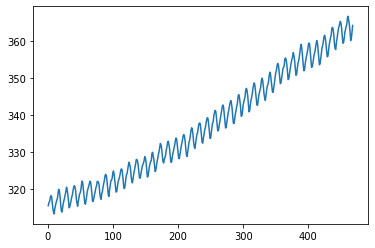

In [ ]:
# 선그리기
plt.plot(co2.seq, co2.x)

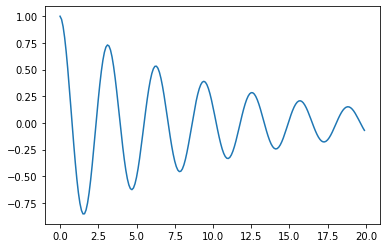

In [ ]:
# plot of mathematical functions
x = np.arange(0, 20, 0.1)
y = np.exp(-x/10)*np.cos(2*x)
plt.plot(x, y)

In [ ]:
# 데이터 읽기
USairpollution = pd.read_csv("/content/drive/MyDrive/DataAnalytics/MultivariateAnalysis/mva/USairpollution.csv")
USairpollution.head(3)

,state,SO2,temp,manu,popul,wind,precip,predays
0,Albany,46,47.6,44,116,8.8,33.36,135
1,Albuquerque,11,56.8,46,244,8.9,7.77,58
2,Atlanta,24,61.5,368,497,9.1,48.34,115


In [ ]:
# SO2 변숫값 * 5
USairpollution["SO2"] = USairpollution["SO2"] * 5

Text(0.5, 1.0, 'Bubble plot')

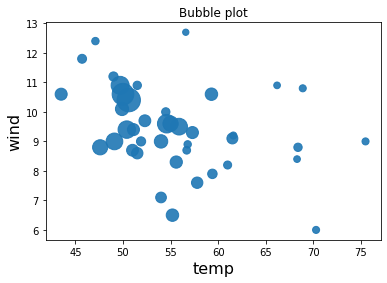

In [ ]:
# 버블차트 그리기
plt.scatter('temp', 'wind', s='SO2', alpha=0.9, data=USairpollution)
plt.xlabel("temp", size=16)
plt.ylabel("wind", size=16)
plt.title("Bubble plot")